In [1]:
# Load the required dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from scipy import stats
from scipy.stats import linregress
from scipy.stats import f_oneway

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras import backend as K
from keras.layers import LeakyReLU
from tensorflow.keras import layers

from pandas.plotting import scatter_matrix

pd.set_option('display.max_columns', 150, 'display.max_rows', 255)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Read in the File and preview it.
df = pd.read_excel("Data_ready.xlsm")
# df.head()

In [3]:
# Calculate age
df['Age']= df['YrSold'] - df['YearBuilt']

In [4]:
# Check and count number of missing values for each variable
# df.isnull().sum()

In [5]:
# Set list of columns to keep for analysis

cols = ['MSSubClass', 'LotArea',
       'Utilities',
       'OverallCond', 
       'RoofMatl', 'Foundation', 
       'CentralAir', 
       'GrLivArea', 
       'KitchenAbvGr', 
       'TotRmsAbvGrd', 'GarageType',
       'GarageArea', 'PavedDrive',  
       'Age',
       'SalePrice']
housing_df = df[cols].copy()
# housing_df.head()

In [6]:
# Delete all the missing values
housing_df = housing_df.dropna()
housing_df.shape

(1379, 15)

In [7]:
# Check datatype of variables and any missing/null values
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1379 non-null   int64 
 1   LotArea       1379 non-null   int64 
 2   Utilities     1379 non-null   object
 3   OverallCond   1379 non-null   int64 
 4   RoofMatl      1379 non-null   object
 5   Foundation    1379 non-null   object
 6   CentralAir    1379 non-null   object
 7   GrLivArea     1379 non-null   int64 
 8   KitchenAbvGr  1379 non-null   int64 
 9   TotRmsAbvGrd  1379 non-null   int64 
 10  GarageType    1379 non-null   object
 11  GarageArea    1379 non-null   int64 
 12  PavedDrive    1379 non-null   object
 13  Age           1379 non-null   int64 
 14  SalePrice     1379 non-null   int64 
dtypes: int64(9), object(6)
memory usage: 172.4+ KB


In [8]:
# Home prices by the year Sold
house_age = housing_df.groupby(['Age']).agg({'SalePrice':['mean','median','std','min', 'max', 'count']})

PearsonRResult(statistic=-0.5081170918651994, pvalue=2.1128704574090893e-91)


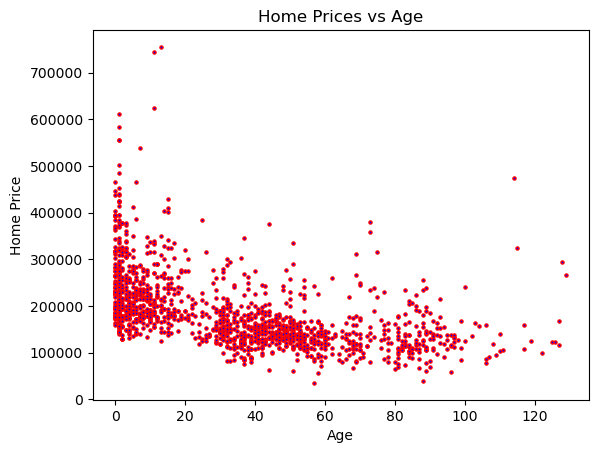

In [9]:
# Scatterplot of Home Price by Age of Home

y_values = housing_df['SalePrice']
x_values = housing_df['Age']
plt.scatter(x_values,y_values, c ="blue", linewidths = 1, marker ="o", edgecolor ="red", s = 5)
plt.title('Home Prices vs Age')
plt.ylabel('Home Price')
plt.xlabel('Age')

correlation = stats.pearsonr(x_values, y_values)
print(f"{correlation}")
plt.show()

In [10]:
# Home prices by the year Sold
year_sold = df.groupby(['YrSold']).agg({'SalePrice':['mean','median','std','min', 'max']})

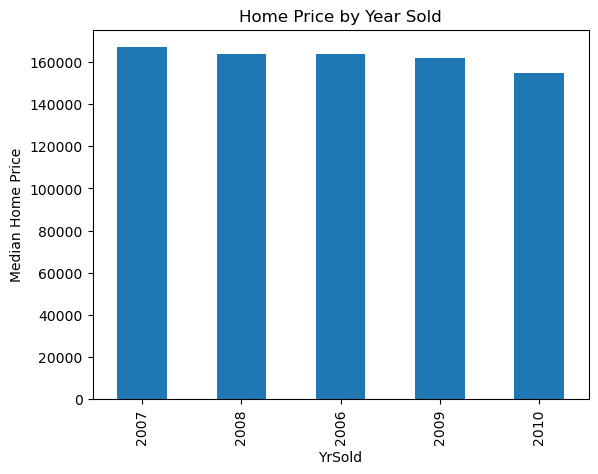

In [11]:
# Median Home Price by year it was sold
yr = df.groupby(['YrSold'])
group0 = yr['SalePrice'].median().sort_values(ascending=False)
price_chart0 = group0.plot(kind='bar', title ='Home Price by Year Sold')
plt.ylabel('Median Home Price')
plt.show()

In [12]:
# Home prices by Overall Condition
cond = df.groupby(['OverallCond']).agg({'SalePrice':['mean','median','var','std','min', 'max']})

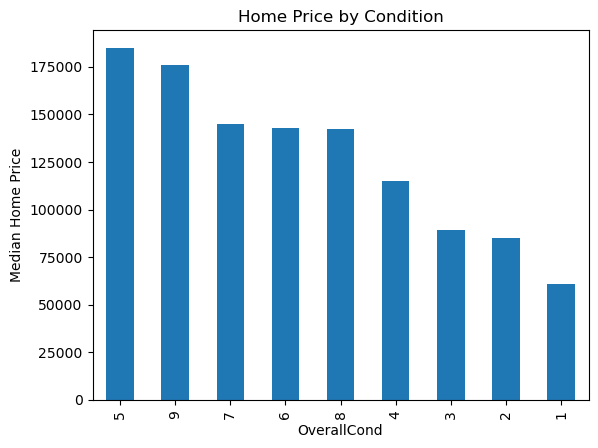

In [13]:
# Median Home Price by the overall condtion rating of the home
hse = df.groupby(['OverallCond'])
group1 = hse['SalePrice'].median().sort_values(ascending=False)
price_chart1 = group1.plot(kind='bar', title ='Home Price by Condition')
plt.ylabel('Median Home Price')
plt.show()

In [14]:
# Get quick summary of the variables.
housing_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,"1,379.00",56.02,41.03,20.00,20.00,50.00,70.00,190.00
LotArea,"1,379.00","10,695.81","10,214.70","1,300.00","7,741.00","9,591.00","11,708.50","215,245.00"
OverallCond,"1,379.00",5.58,1.08,2.00,5.00,5.00,6.00,9.00
GrLivArea,"1,379.00","1,534.69",519.14,438.00,"1,154.00","1,479.00","1,790.00","5,642.00"
KitchenAbvGr,"1,379.00",1.04,0.20,1.00,1.00,1.00,1.00,3.00
TotRmsAbvGrd,"1,379.00",6.55,1.59,3.00,5.00,6.00,7.00,12.00
GarageArea,"1,379.00",500.76,185.68,160.00,380.00,484.00,580.00,"1,418.00"
Age,"1,379.00",34.85,29.42,0.00,7.00,33.00,53.00,129.00
SalePrice,"1,379.00","185,479.51","79,023.89","35,311.00","134,000.00","167,500.00","217,750.00","755,000.00"


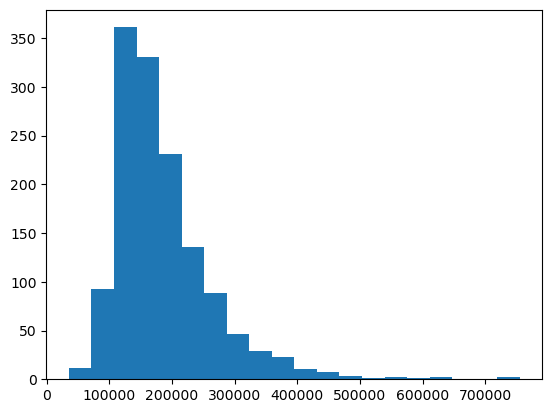

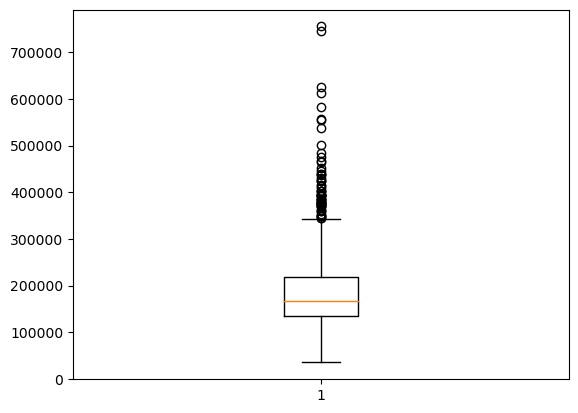

In [15]:
# Run some exploratory plots to find relationships.
plt.hist(housing_df['SalePrice'], bins=20)
plt.show()
plt.boxplot(housing_df['SalePrice'])
plt.show()

In [16]:
# Create a copy of housing_df to use in neural networks
nn_df = housing_df.copy()
# nn_df.columns

In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy =  nn_df.dtypes[nn_df.dtypes == "object"].index.tolist()
df_dummies = pd.get_dummies(nn_df, columns=dummy)

df_dummies = df_dummies.dropna()

In [18]:
# Remove outliers in SalePrice
quartiles = df_dummies['SalePrice'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]

# compute lower and upper bounds
ll = quartiles[0.25] - 1.5*iqr
ul = quartiles[0.75] + 1.5*iqr

# Define a new column to filter out outliers
df_dummies['norm_price'] = df_dummies['SalePrice']

# filiter out the outliers
df_dummies = df_dummies.loc[(df_dummies['norm_price'] >= ll) &
                            (df_dummies['SalePrice'] <= ul)]
#drop the column norm_price
df_dummies = df_dummies.drop('norm_price', axis=1)

In [19]:
# df_dummies.describe().transpose()

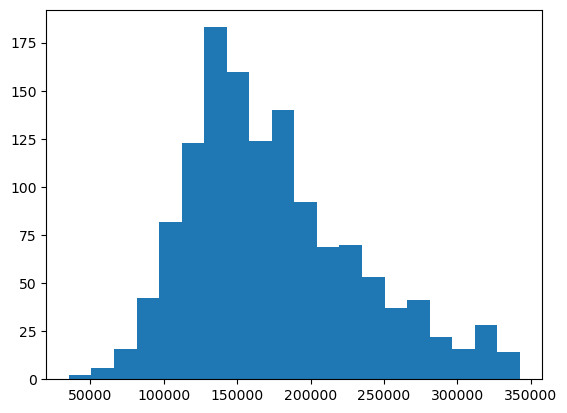

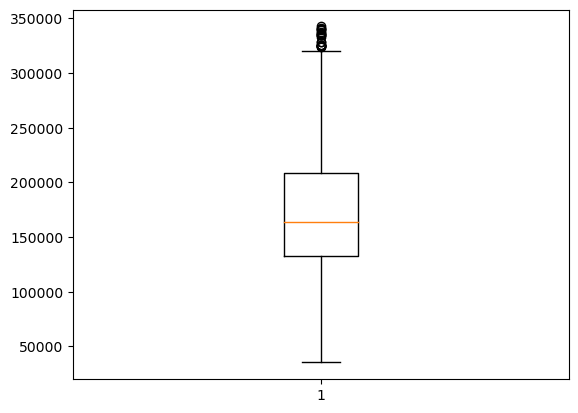

In [20]:
# Check distribution of SalePrice without the outliers
plt.hist(df_dummies['SalePrice'], bins=20)
plt.show()
plt.boxplot(df_dummies['SalePrice'])
plt.show()

In [21]:
# Split our preprocessed data into our features and target arrays
y = df_dummies['SalePrice'].values
X = df_dummies.drop(['SalePrice'],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train a Deep Nueral Network to Predict Housing Prices

In [23]:
def rmse(y_test, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_test)))

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
from keras.layers import LeakyReLU
number_input_features = len(X_train_scaled[0]) #len(train_features.columns)
hidden_nodes_layer1 =  250
hidden_nodes_layer2 = 150
hidden_nodes_layer3 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="LeakyReLU"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               9000      
                                                                 
 dense_1 (Dense)             (None, 150)               37650     
                                                                 
 dense_2 (Dense)             (None, 50)                7550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 54251 (211.92 KB)
Trainable params: 54251 (211.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=[rmse])

In [26]:
# Train the model
# fit_model = nn.fit(train_features, train_labels, epochs=100)
fit_model = nn.fit(X_train_scaled, y_train, epochs=150, validation_split = 0.1)

Epoch 1/150
28/28 [==============================] - 1s 7ms/step - loss: 33603887104.0000 - rmse: 182861.8438 - val_loss: 34448465920.0000 - val_rmse: 194056.1875
Epoch 2/150
28/28 [==============================] - 0s 2ms/step - loss: 33570390016.0000 - rmse: 182920.4688 - val_loss: 34371260416.0000 - val_rmse: 193843.1875
Epoch 3/150
28/28 [==============================] - 0s 2ms/step - loss: 33387962368.0000 - rmse: 182582.7500 - val_loss: 34025811968.0000 - val_rmse: 192864.1719
Epoch 4/150
28/28 [==============================] - 0s 2ms/step - loss: 32735961088.0000 - rmse: 180710.5312 - val_loss: 32960712704.0000 - val_rmse: 189785.3125
Epoch 5/150
28/28 [==============================] - 0s 2ms/step - loss: 31026495488.0000 - rmse: 175821.2969 - val_loss: 30501449728.0000 - val_rmse: 182448.1562
Epoch 6/150
28/28 [==============================] - 0s 2ms/step - loss: 27584897024.0000 - rmse: 165754.1094 - val_loss: 25911199744.0000 - val_rmse: 167833.1719
Epoch 7/150
28/28 [===

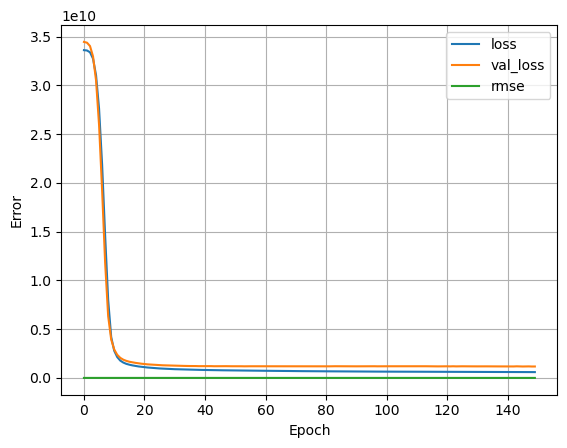

In [27]:
#plot the validation results
plt.plot(fit_model.history['loss'], label='loss')
plt.plot(fit_model.history['val_loss'], label='val_loss')
plt.plot(fit_model.history['rmse'], label='rmse')
# plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [28]:
# collect the results
test_results['nn_model'] = nn.evaluate(
    X_train_scaled, y_train, verbose=0)
    # test_features, test_labels, verbose=0)

NameError: name 'test_results' is not defined

In [ ]:
# # Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

11/11 - 0s - loss: 737298048.0000 - rmse: 26773.4863 - 486ms/epoch - 44ms/step
Loss: 737298048.0, Accuracy: 26773.486328125


11/11 [==============================] - 0s 3ms/step


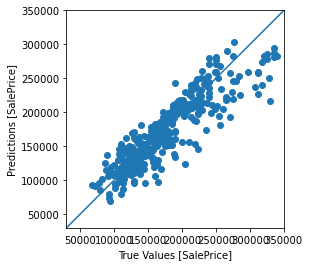

In [ ]:
# Make predictions using the model
# test_predictions = nn.predict(test_features).flatten()
y_pred = nn.predict(X_test_scaled).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [SalePrice]')
plt.ylabel('Predictions [SalePrice]')
lims = [30000, 350000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

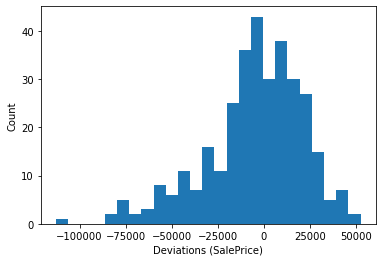

In [ ]:
# Check error distribution
# error = test_predictions - test_labels
error = y_pred - y_test
plt.hist(error, bins=25)
plt.xlabel('Deviations (SalePrice)')
_ = plt.ylabel('Count')

# Using Results from the Hyperparameter tuning to fit a neural network model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  43
hidden_nodes_layer2 = 221
hidden_nodes_layer3 = 243
hidden_nodes_layer4 = 225
hidden_nodes_layer5 = 35
hidden_nodes_layer6 = 187


nn_tuned = tf.keras.models.Sequential()

# First hidden layer
nn_tuned.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_tuned.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn_tuned.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn_tuned.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Fifth hidden layer
nn_tuned.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Sixth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="relu"))

# Output layer
nn_tuned.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_tuned.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 43)                1548      
                                                                 
 dense_8 (Dense)             (None, 221)               9724      
                                                                 
 dense_9 (Dense)             (None, 243)               53946     
                                                                 
 dense_10 (Dense)            (None, 225)               54900     
                                                                 
 dense_11 (Dense)            (None, 35)                7910      
                                                                 
 dense_13 (Dense)            (None, 1)                 36        
                                                                 
Total params: 128064 (500.25 KB)
Trainable params: 128

In [ ]:
# # Compile the model
nn_tuned.compile(loss="mean_squared_error", optimizer="adam", metrics=[rmse])

In [ ]:
# # Train the model
fit_model_tuned = nn_tuned.fit(X_train_scaled, y_train, epochs=100, validation_split = 0.15)

Epoch 1/100
23/27 [========================>.....] - ETA: 0s - loss: 33872156672.0000 - rmse: 183805.4375

27/27 [==============================] - 1s 26ms/step - loss: 33623857152.0000 - rmse: 183348.5625 - val_loss: 34073458688.0000 - val_rmse: 184434.3750
Epoch 2/100
27/27 [==============================] - 0s 14ms/step - loss: 33623859200.0000 - rmse: 183102.4219 - val_loss: 34073458688.0000 - val_rmse: 184434.3750
Epoch 3/100
27/27 [==============================] - 0s 15ms/step - loss: 33623848960.0000 - rmse: 184060.3281 - val_loss: 34073458688.0000 - val_rmse: 184434.3750
Epoch 4/100
27/27 [==============================] - 0s 16ms/step - loss: 33623855104.0000 - rmse: 182224.2812 - val_loss: 34073458688.0000 - val_rmse: 184434.3750
Epoch 5/100
27/27 [==============================] - 0s 15ms/step - loss: 33623863296.0000 - rmse: 182428.1406 - val_loss: 34073458688.0000 - val_rmse: 184434.3750
Epoch 6/100
27/27 [==============================] - 0s 17ms/step - loss: 33623855104.0000 - rmse: 182884.5781 - val_loss: 34073458688.0000 - val_rmse: 184434.3750
Epoch 7/100
27/27 [=========

In [ ]:
# # Evaluate the model using the test data
model_loss, model_accuracy = nn_tuned.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

11/11 - 0s - loss: 34473586688.0000 - rmse: 185687.3750 - 462ms/epoch - 42ms/step
Loss: 34473586688.0, Accuracy: 185687.375


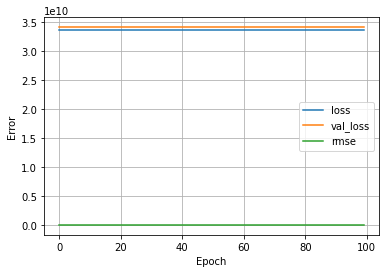

In [ ]:
#plot the validation results
plt.plot(fit_model_tuned.history['loss'], label='loss')
plt.plot(fit_model_tuned.history['val_loss'], label='val_loss')
plt.plot(fit_model_tuned.history['rmse'], label='rmse')
# plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)


11/11 [==============================] - 1s 5ms/step


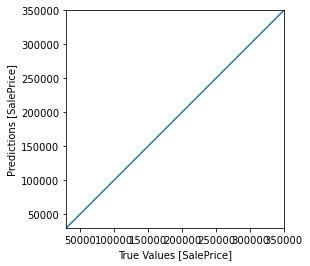

In [ ]:
# Make predictions using the model
y_pred_tuned = nn_tuned.predict(X_test_scaled).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_tuned)
plt.xlabel('True Values [SalePrice]')
plt.ylabel('Predictions [SalePrice]')
lims = [30000, 350000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Keras Hyperparameter tuning

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh', 'LeakyReLU', 'sigmoid', 'softmax'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=256,
        step=2), activation=activation, input_dim=35))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=256,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="relu"))

    # Compile the model
    nn_model.compile(loss="mean_squared_error", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [ ]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective=kt.Objective('loss', direction='min'),
    max_epochs=10,
    overwrite = True,
    directory='project',
    hyperband_iterations=2)

In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=10,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 10s]
loss: 33691867136.0

Best loss So Far: 746297216.0
Total elapsed time: 00h 08m 52s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# best model
top_hyper = tuner.get_best_hyperparameters(1)
top_hyper

In [ ]:
[model.values for model in top_hyper]

[{'activation': 'relu',
  'first_units': 253,
  'num_layers': 5,
  'units_0': 43,
  'units_1': 221,
  'units_2': 243,
  'units_3': 225,
  'units_4': 35,
  'units_5': 187,
  'tuner/epochs': 10,
  'tuner/initial_epoch': 4,
  'tuner/bracket': 1,
  'tuner/round': 1,
  'tuner/trial_id': '0049'}]

In [ ]:
top_model = tuner.get_best_models(1)

In [ ]:
top_mod_hyp = tuner.get_best_hyperparameters(1)
top_mod_hyp

In [ ]:
top_model[0].evaluate(X_test_scaled,y_test,verbose=2)

11/11 - 1s - loss: 782471616.0000 - accuracy: 0.0000e+00 - 1s/epoch - 135ms/step


[782471616.0, 0.0]

In [ ]:
y_pred = top_model[0].predict(X_test_scaled)

11/11 [==============================] - 0s 3ms/step


In [ ]:
errors = (y_pred-y_test.reshape(-1,1))/y_test.reshape(-1,1)

In [ ]:
errors.max()

0.5890974799096914

In [ ]:
errors.mean()

0.008351330019350844

In [ ]:
errors.min()

-0.3622677210365854

In [ ]:
errors

array([[-0.25143169],
       [ 0.04408697],
       [-0.00170578],
       [-0.16712064],
       [-0.03825339],
       [-0.06378   ],
       [-0.04135996],
       [-0.29159621],
       [-0.11691859],
       [ 0.14027054],
       [ 0.23912775],
       [-0.13095958],
       [ 0.08836951],
       [ 0.12646622],
       [-0.27148523],
       [-0.04267858],
       [-0.18025633],
       [ 0.04352447],
       [-0.06386495],
       [ 0.07957391],
       [ 0.11695677],
       [-0.12799517],
       [ 0.00431574],
       [ 0.03708771],
       [ 0.00449933],
       [ 0.29664219],
       [-0.03960756],
       [-0.05422682],
       [ 0.17469268],
       [ 0.13221369],
       [ 0.51149855],
       [ 0.0853515 ],
       [-0.05737344],
       [-0.05618274],
       [-0.14143891],
       [-0.36226772],
       [-0.16552941],
       [-0.01783794],
       [-0.12313795],
       [-0.09951147],
       [-0.07106748],
       [-0.01848298],
       [ 0.10768499],
       [-0.22959794],
       [ 0.08306397],
       [ 0